In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
os.chdir("F:\DATASCIENCE\EDWISOR\Project\EMPLOYEE ABSENTEEISM")

In [3]:
data = pd.read_excel("work.xls")

In [ ]:
data.shape

In [ ]:
data.head(7)

In [ ]:
data.dtypes

In [ ]:
data.describe().transpose()

In [ ]:
data.hist(figsize=(15,15))

# MISSING VALUE ANALYSIS 

In [ ]:
data.isnull().sum()

SINCE WE HAVE 36 UNIQUE VALUES OF ID, IT CAN BE VERY USEFUL FOR IMPUTING MISSING PERSONAL DATA OF EMPLOYEES

In [4]:

#TRANSPORTATION EXPENSE
for x in range(len(data["Transportation expense"])):
    if pd.isnull(data["Transportation expense"][x]):
        ID = data["ID"][x] 
        data["Transportation expense"][x] = round(data[data["ID"] == ID]["Transportation expense"].mean(), 2)

#DISTANCE FROM RESIDENCE TO WORK
for x in range(len(data["Distance from Residence to Work"])):
    if pd.isnull(data["Distance from Residence to Work"][x]):
        ID = data["ID"][x] 
        data["Distance from Residence to Work"][x] = round(data[data["ID"] == ID]["Distance from Residence to Work"].mean(), 2)

#SERVICE TIME
for x in range(len(data["Service time"])):
    if pd.isnull(data["Service time"][x]):
        ID = data["ID"][x] 
        data["Service time"][x] = round(data[data["ID"] == ID]["Service time"].mean(), 2)
    
#AGE
for x in range(len(data["Age"])):
    if pd.isnull(data["Age"][x]):
        ID = data["ID"][x] 
        data["Age"][x] = round(data[data["ID"] == ID]["Age"].mean(), 2)

#EDUCATION
for x in range(len(data["Education"])):
    if pd.isnull(data["Education"][x]):
        ID = data["ID"][x] 
        data["Education"][x] = data[data["ID"] == ID]["Education"].mode()
        
#SON
for x in range(len(data["Son"])):
    if pd.isnull(data["Son"][x]):
        ID = data["ID"][x] 
        data["Son"][x] = data[data["ID"] == ID]["Son"].mode()

#SOCIAL DRINKER
for x in range(len(data["Social drinker"])):
    if pd.isnull(data["Social drinker"][x]):
        ID = data["ID"][x] 
        data["Social drinker"][x] = data[data["ID"] == ID]["Social drinker"].mode()

#SOCIAL SMOKER
for x in range(len(data["Social smoker"])):
    if pd.isnull(data["Social smoker"][x]):
        ID = data["ID"][x] 
        data["Social smoker"][x] = data[data["ID"] == ID]["Social smoker"].mode()

#PET
for x in range(len(data["Pet"])):
    if pd.isnull(data["Pet"][x]):
        ID = data["ID"][x] 
        data["Pet"][x] = data[data["ID"] == ID]["Pet"].mode()

#WEIGHT
for x in range(len(data["Weight"])):
    if pd.isnull(data["Weight"][x]):
        ID = data["ID"][x] 
        data["Weight"][x] = data[data["ID"] == ID]["Weight"].mode()

#HEIGHT
for x in range(len(data["Height"])):
    if pd.isnull(data["Height"][x]):
        ID = data["ID"][x] 
        data["Height"][x] = data[data["ID"] == ID]["Height"].mode()

#BMI
for x in range(len(data["Body mass index"])):
    if pd.isnull(data["Body mass index"][x]):
        ID = data["ID"][x] 
        data["Body mass index"][x] = data[data["ID"] == ID]["Body mass index"].mode()


C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a co

In [5]:
#Impute reason for absence,month and disciplinary failure with mode

data['Reason for absence'] = data['Reason for absence'].fillna(23.0)
data['Disciplinary failure'] = data['Disciplinary failure'].fillna(0.0)
data['Month of absence'] = data['Month of absence'].fillna(3.0)

In [6]:
#Imputing with mean for average work load and hit target
data['Work load Average/day '] = data['Work load Average/day '].fillna(data['Work load Average/day '].mean())
data['Hit target'] = data['Hit target'].fillna(data['Hit target'].mean())

REASON OF ABSENCE CAN BE USED FOR ABSENTEEISM TIME IN HOURS

In [7]:
for x in range(len(data["Absenteeism time in hours"])):
    if pd.isnull(data["Absenteeism time in hours"][x]):
        reason = data["Reason for absence"][x] 
        data["Absenteeism time in hours"][x] = data[data["Reason for absence"] == reason]["Absenteeism time in hours"].median()


C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
data.isnull().sum()

In [ ]:
data.dtypes

## OUTLIER ANALYSIS

In [ ]:
data.plot(kind='box',subplots=True,layout=(11,2),sharex=False,sharey=False,figsize=(30,30))
plt.show()


OUTLIERS ARE PRESENT IN MANY VARIABLES.
OUR FIRST STEP WOULD BE TO REPLACE THEM WITH NA.

In [8]:
numeric = ['Transportation expense' , 'Distance from Residence to Work' , 'Service time' , 'Age' ,
           'Work load Average/day ' , 'Hit target' , 'Weight' , 'Height' , 'Body mass index' , 'Absenteeism time in hours']
data[numeric] = data[numeric].apply(pd.Series.astype, dtype = 'int')
for i in numeric:
    q75 , q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75  -  q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    print(min)
    print(max)
    
    data.loc[data[i] < min,i] = np.nan
    data.loc[data[i] > max,i] = np.nan
    

print(min)

print(max)

57.5
381.5
-35.0
101.0
-1.5
26.5
17.5
53.5
183688.0
345552.0
87.0
103.0
39.0
119.0
164.5
176.5
13.5
41.5
-7.0
17.0
-7.0
17.0


In [9]:
#Impute replaced outliers
data['Transportation expense'] = data['Transportation expense'].fillna(data['Transportation expense'].median())
data['Service time']= data['Service time'].fillna(data['Service time'].median())
data['Height']= data['Height'].fillna(data['Height'].median())

data['Hit target']= data['Hit target'].fillna(data['Hit target'].median())
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Work load Average/day ']= data['Work load Average/day '].fillna(data['Work load Average/day '].median())
data['Absenteeism time in hours']= data['Absenteeism time in hours'].fillna(data['Absenteeism time in hours'].median())

In [ ]:
data.isnull().sum()

###### HYPOTHESIS ON FEATURES WHICH MAY CAUSE MOST ABSENTEEISM:
1. REASON OF ABSENCE
2. SEASONS
3. TRANSPORTAION EXPENSE
4. DISTANCE FROM WORK
5. AGE
6. WORK LOAD
7. SON
8. PET
10. BMI(UNHEALTHY MIGHT LEAD TO POINT NO. 1 I.E. ILLNESS)

In [10]:
data.info()
#CONVERTING DATATYPES
data['ID'] = data['ID'].astype('category')
data['Month of absence'] = data['Month of absence'].astype('category')
data['Reason for absence'] = data['Reason for absence'].astype('category')
data['Day of the week'] = data['Day of the week'].astype('category')
data['Seasons'] = data['Seasons'].astype('category')
data['Disciplinary failure'] = data['Disciplinary failure'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Son'] = data['Son'].astype('category')
data['Social drinker'] = data['Social drinker'].astype('category')
data['Social smoker'] = data['Social smoker'].astype('category')
data['Pet'] = data['Pet'].astype('category')


                   
                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null float64
Month of absence                   740 non-null float64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null float64
Distance from Residence to Work    740 non-null float64
Service time                       740 non-null float64
Age                                740 non-null float64
Work load Average/day              740 non-null float64
Hit target                         740 non-null float64
Disciplinary failure               740 non-null float64
Education                          740 non-null float64
Son                                740 non-null float64
Social drinker                     740 non-null float64
Social smoker                      740 non-null float64
Pet  

In [11]:
data = data.rename(columns = {'Reason for absence': 'reason','Month of absence':'month' , 'Day of the week':'Day', 'Transportation expense':'fare'
                             , 'Distance from Residence to Work': 'distance' , 'Work load Average/day ':'workload'
                             , 'Body mass index': 'bmi', 'Absenteeism time in hours': 'absent_time'})

In [ ]:
data.dtypes

In [12]:
numeric = ['fare','distance','Service time','Age','workload','Hit target','Weight','Height','bmi','absent_time']
cat = ['ID','reason','month','Day','Seasons','Disciplinary failure','Education','Son','Social drinker','Social smoker'
       ,'Pet']

In [ ]:
data.hist(figsize=(15,20))

# UNDERSTANDING ABSENTEEISM BY EMPLOYEE ID

In [13]:
total_time = data.groupby(["ID"]).sum()[['absent_time']]

In [14]:
total_time = total_time.rename(columns={'absent_time': 'total_absent_time'})

In [15]:
id_data = data.groupby(["ID"]).mean()

In [16]:
id_data = pd.concat((id_data,total_time),axis=1)

In [17]:

id_data = id_data.rename(columns={'absent_time':'mean_absent_time'})


id_data has 36 rows,one of each ID.
It has employee wise information of various features and also mean_absent_time and total_absent_time

In [18]:
n=data.groupby(['ID']).agg(lambda x: stats.mode(x)[0][0])
n=n.drop(['fare','distance','Service time','Age','workload','Hit target','Weight','Height','bmi','absent_time'],axis=1)

In [19]:
id_data = pd.concat((id_data,n),axis=1)

In [ ]:
id_data.head(10)

In [ ]:
# MOST FREQUENT ABSENTEE
plt.figure(figsize=(15,9))
sns.countplot(x='ID',palette='muted',data=data)

vERY HIGH = ID NO. 3 > 28 > 34
LOWEST = ID NO. 4,35

MOST HOURS ABSENT

In [ ]:

plt.figure(figsize=(15,9))
id_data['total_absent_time'].nlargest(15).plot(kind='barh')

ID - 3,11,28,20 have maximum hours absent

In [ ]:
#INspecting Employees with most absent
id_data.iloc[2,:]

FOR ID 3 DISTANCE =51. Mode--> reason= 27, month = 2, drinker=yes,smoker=no. Education=1

In [ ]:
id_data.iloc[10,:]

FOR ID 11. REASON- 19, EDU-1, SON-2. DRINKER= YES, SMOKER=NO.
Rest looks normal

In [ ]:
id_data.iloc[27,:]

FOR ID 28:- REASON-23,SON-1,PET-2,DRINKER&SMOKER = NO, MONTH=2


In [ ]:
id_data.iloc[19,:]

ID - 20. distance=50, day=6, son=4, education=1, reason =28.

# ABSENTEEISM & REASON FOR ABSENCE

In [ ]:
#MOST FREQUENT REASON FOR ABSENTEEISM
plt.figure(figsize=(15,8))
sns.countplot(x='reason',data=data)

# REASON 23,28,27,13

23 - medical consultation

28-dental consultation

27 - physiotherapy


13-Diseases of the musculoskeletal system and connective tissue

In [ ]:
re.sort_values(by='absent_time')

In [ ]:
re= data.groupby(["reason"]).sum()[['absent_time']]

In [ ]:
plt.figure(figsize=(15,9))
re['absent_time'].nlargest(29).plot(kind='barh')

Reason 23,13,28,22 & 19 have the maximum absent time

TOTAL ABSENTEEISM TIME PER MONTH

In [ ]:
m  = data.groupby(['month']).sum()[['absent_time']]
plt.figure(figsize=(15,9))
m['absent_time'].plot(kind='bar')

MARCH HAS THE HIGHEST ABSENTEEISM, FOLLOWED BY JULY .
JANUARY AND SEPTEMBER HAVE THE LEAST

ABSENTEEISM BY DAY OF THE WEEK

In [ ]:
D= data.groupby(['Day']).sum()[['absent_time']]
plt.figure(figsize=(15,9))
D['absent_time'].plot(kind='bar')

MONDAY OBVIOUSLY HAS THE MAX. BUT THE TREND IS VERY MUCH THE SAME THROUGHOUT THE WEEK.

SEASON WISE ABSENTEEISM

In [ ]:
S= data.groupby(['Seasons']).sum()[['absent_time']]
plt.figure(figsize=(8,8))
S['absent_time'].plot(kind='bar')

ALL SEASONS HAVE SIMILAR VALUES

In [ ]:
sns.countplot(x='Disciplinary failure',data=data)

In [ ]:
data['Disciplinary failure'].value_counts()

EDUCATION

In [ ]:
sns.countplot(x='Education',data=data)

In [ ]:
id_data['Education'].value_counts()

In [ ]:
e = data.groupby(['Education']).sum()[['absent_time']]

In [ ]:
e['absent_time'].plot(kind='barh')

more than 80% instances are of employees having education 1. automatically they contribute to maximum absenteeism

In [ ]:
data.groupby(['Son']).sum()[['absent_time']]

In [ ]:
id_data['Son'].value_counts()

In [ ]:
sns.catplot(x='Son',y='absent_time',kind='bar',data=data)

In [ ]:
id_data['Social drinker'].value_counts()

In [ ]:
data.groupby(['Social drinker']).sum()[['absent_time']].plot(kind='bar')

In [ ]:
id_data['Social smoker'].value_counts()

In [ ]:
data.groupby(['Social smoker']).sum()[['absent_time']].plot(kind='barh')

In [ ]:
id_data['Pet'].value_counts()

In [ ]:
data.groupby(['Pet']).sum()[['absent_time']].plot(kind='barh')

# NUMERICAL FEATURES 

# HEATMAP

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(data.corr(),annot=True,cbar = True,cmap="Blues")

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(id_data.corr(),annot=True,cbar = True,cmap="Blues")

In [ ]:
for i in cat:
    id_data[i] = data[i].astype('category')

AGE

In [ ]:
sns.lmplot(x='Age',y="mean_absent_time",data=id_data)

In [ ]:
sns.lmplot(x='Age',y='total_absent_time',data=id_data)

TOTAL ABSENTEEISM TIME IS DECREASING WITH INCREASING AGE

SERVICE TIME

In [ ]:
sns.lmplot(x='Service time',y="total_absent_time",data=id_data)

In [ ]:
sns.lmplot(x='Service time',y='mean_absent_time',data=id_data)

TOTAL ABSENTEEISM TIME SHOWS A SLIGHT INCREASE WITH SERVICE TIME

DISTANCE FROM WORK

In [ ]:
sns.lmplot(x='distance',y='mean_absent_time',data=id_data)

In [ ]:
sns.lmplot(x='distance',y='total_absent_time',data=id_data)

TOTAL ABSENTEEISM TIME IS INCREASING WITH DISTANCE

TRANSPORTATION EXPENSE

In [ ]:
sns.lmplot(x='fare',y='mean_absent_time',data=id_data)

In [ ]:
sns.lmplot(x='fare',y='total_absent_time',data=id_data)

MEAN ABSENT TIME IS INCREASING WITH TRANSPORTATION EXPENSE

BMI

In [ ]:
sns.lmplot(x='bmi',y='mean_absent_time',data=id_data)

In [ ]:
sns.lmplot(x='bmi',y='total_absent_time',data=id_data)

MEAN ABSENT TIME SHOWS A DECREASING TREND WITH INCREASING BMI

WORKLOAD AND HIT TARGET

In [ ]:
sns.lmplot(x='workload',y='mean_absent_time',data=id_data)

In [ ]:
sns.lmplot(x='workload',y='total_absent_time',data=id_data)

In [ ]:
sns.lmplot(x='Hit target',y='mean_absent_time',data=id_data)

In [ ]:
sns.lmplot(x='Hit target',y='total_absent_time',data=id_data)

MEAN ABSENT TIME IS DECREASING WITH WORKLOAD WHILE IT INCREASES WITH HIT TARGET 

# CHI-SQUARE TEST

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
factors_paired = [(i,j) for i in cat for j in cat] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(data[f[0]], data[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((11,11))
p1 = pd.DataFrame(p1, index=cat, columns=cat)
p1

P-VALUES LESS THAN 0.05:-

1. ID WITH EDUCATION,PET AND SON 

2. MONTH AND SEASONS

In [20]:
data2 = data.copy()

# FEATURE SELECTION

In [21]:
X= data.drop(['Education','Disciplinary failure','Seasons','fare','ID','Service time','workload','distance','Height'
              ,'absent_time','Weight','Day'],axis=1)
y = data[['absent_time']]

In [23]:
c = [['Hit target','bmi','Age']]

In [24]:
for i in range(len(data)):
    if data2.loc[i,'reason'] < 10:
        data2.loc[i,'reason'] = 1

# FEATURE SCALING

In [25]:
for i in c:
    maxx = X[i].max()
    minn = X[i].min()
    
    X[i] = (X[i] - minn)/(maxx - minn)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
 X.dtypes

# LINEAR REGRESSION

In [26]:
x1 = X.copy()

In [ ]:
X.dtypes

In [27]:
#ONE -HOT ENCODING
dumm = ['reason','month','Son','Social smoker','Social drinker','Pet']
for i in dumm:
    X = pd.get_dummies(X,columns=[i],drop_first=True)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [29]:
import statsmodels.api as sm

In [30]:
m= sm.OLS(y_train,x_train.astype(float)).fit()

In [31]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            absent_time   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     35.66
Date:                Sat, 26 Jan 2019   Prob (F-statistic):          1.13e-136
Time:                        16:48:32   Log-Likelihood:                -1295.2
No. Observations:                 555   AIC:                             2694.
Df Residuals:                     503   BIC:                             2919.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -2.4365      0.787     -3.097      0.002      -3.982      -0.891
Hit target            -0.0438      0.706     -0.062      0.951      -1.431       1.344
bmi                    1.1270      0.760      1.484      0.139      -0.366       2.620
reason_1.0             7.9764      0.877      9.099      0.000       6.254       9.699
reason_2.0          7.074e-15   3.56e-15      1.986      0.048    7.47e-17    1.41e-14
reason_3.0             8.7133      2.754      3.164      0.002       3.302      14.125
reason_4.0             5.5715      2.010      2.771      0.006       1.622       9.521
reason_5.0             6.5060      1.946      3.343      0.001       2.682      10.330
reason_6.0             7.3002      1.213      6.017      0.000       4.917       9.684
reason_7.0             4.2805      1.011      4.233      0.000       2.294       6.267
reason_8.0             5.3567      1.193      4.491      0.000       3.014       7.700
reason_9.0             6.2778      1.950      3.219      0.001       2.446      10.110
reason_10.0            6.4802      0.783      8.272      0.000       4.941       8.019
reason_11.0            5.4329      0.754      7.208      0.000       3.952       6.914
reason_12.0            5.0561      1.217      4.153      0.000       2.664       7.448
reason_13.0            6.0505      0.645      9.376      0.000       4.783       7.318
reason_14.0            5.1696      0.875      5.909      0.000       3.451       6.889
reason_15.0            7.8203      1.965      3.980      0.000       3.960      11.680
reason_16.0            2.1749      1.952      1.114      0.266      -1.660       6.010
reason_17.0            7.3266      2.726      2.688      0.007       1.971      12.682
reason_18.0            6.3968      0.889      7.194      0.000       4.650       8.144
reason_19.0            6.5911      0.715      9.220      0.000       5.187       7.996
reason_21.0            5.6870      1.297      4.383      0.000       3.138       8.236
reason_22.0            6.9851      0.742      9.415      0.000       5.528       8.443
reason_23.0            2.9529      0.545      5.415      0.000       1.881       4.024
reason_24.0            7.4505      1.643      4.536      0.000       4.223      10.678
reason_25.0            3.7532      0.752      4.994      0.000       2.277       5.230
reason_26.0            7.4535      0.722     10.319      0.000       6.034       8.873
reason_27.0            2.0229      0.670      3.018      0.003       0.706       3.340
reason_28.0            2.6006      0.573      4.537      0.000       1.475       3.727
month_1.0             -0.1383      0.916     -0.151      0.880      -1.938       1.661
month_2.0              0.3010      0.904      0.333      0.739      -1.475       2.077
month_3.0              0.9794      0.8

In [32]:
p = m.predict(x_test)

In [33]:
np.sqrt(mean_squared_error(y_test,p))


2.749273624310285

# RANDOM FOREST

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x1,y, test_size=0.25)

In [35]:
rf = RandomForestRegressor(n_estimators = 300,bootstrap=True,max_depth=30,oob_score=True, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train)

C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [36]:
p =rf.predict(x_test)

In [37]:
rf.score(x_train,y_train)

0.8254173239370584

In [38]:
np.sqrt(mean_squared_error(y_test,p))

2.260383150765134

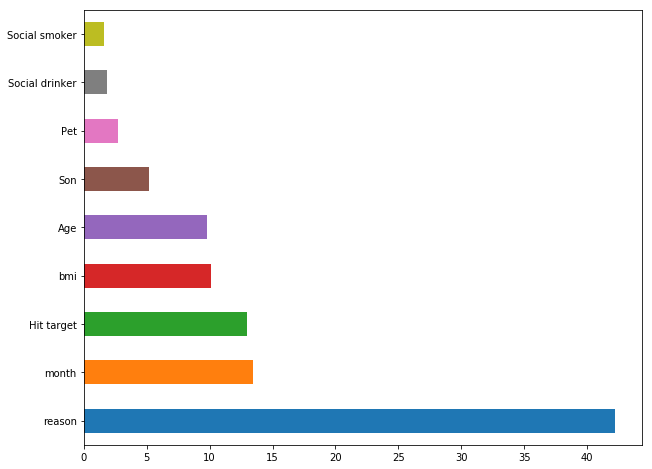

In [39]:
feat_importances = pd.Series(rf.feature_importances_*100, index=x_train.columns)
feat_importances.nlargest(18).plot(kind='barh',figsize=(10,8))

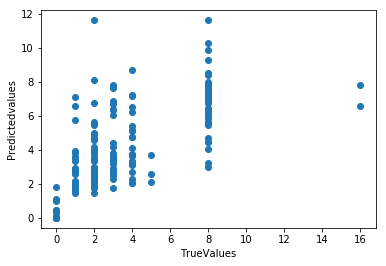

In [40]:
plt.scatter(y_test,p)
plt.xlabel("TrueValues")
plt.ylabel("Predictedvalues")
plt.show()

we assume that the employees work 8 hours a day

In [43]:
#LOSSES EVERY MONTH
new = data[['month','workload','absent_time']]

new["Loss"]=(new['workload']*new['absent_time'])/8

new["Loss"] = np.round(new["Loss"]).astype('int64')

new.head()



C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ataf\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month,workload,absent_time,Loss
0,7.0,239554.0,4.0,119777
1,7.0,239554.0,0.0,0
2,7.0,239554.0,2.0,59888
3,7.0,239554.0,4.0,119777
4,7.0,239554.0,2.0,59888


In [44]:
No_absent = new[new['month'] == 0]['Loss'].sum()
January = new[new['month'] == 1]['Loss'].sum()
February = new[new['month'] == 2]['Loss'].sum()
March = new[new['month'] == 3]['Loss'].sum()
April = new[new['month'] == 4]['Loss'].sum()
May = new[new['month'] == 5]['Loss'].sum()
June = new[new['month'] == 6]['Loss'].sum()
July = new[new['month'] == 7]['Loss'].sum()
August = new[new['month'] == 8]['Loss'].sum()
September = new[new['month'] == 9]['Loss'].sum()
October = new[new['month'] == 10]['Loss'].sum()
November = new[new['month'] == 11]['Loss'].sum()
December = new[new['month'] == 12]['Loss'].sum()

record = {'No Absent': No_absent, 'Janaury': January,'Febraury': February,'March': March,
       'April': April, 'May': May,'June': June,'July': July,
       'August': August,'September': September,'October': October,'November': November,
       'December': December}

WorkLoss = pd.DataFrame.from_dict(record, orient='index')

WorkLoss.rename(index=str, columns={0: "Work Load Loss/Month"})

,Work Load Loss/Month
No Absent,0
Janaury,6778161
Febraury,9302313
March,15454922
April,7751790
May,7734901
June,7751274
July,11401779
August,7414786
September,5917447
